In [3]:
import pandas as pd
import numpy as np

path = '/Users/GS7271/Documents/COESIA/'

wpdtc = pd.read_csv(path + 'WPDTC_20180207.csv')

wpdtc.tail(10)

,Plant,Vendor,Material,Material Description,CPDT
33569,RA02,1012583,044-140-01019,CALIBRATION KIT FOR DRAGER SENSOR,9
33570,RA02,1012583,044-140-01020,CALIBRATION ADAPTER FOR PIR 7000,9
33571,RA02,1012583,044-140-01021,"CYL, GAS PROPANE 0.75 VOL. %",9
33572,RA02,1013378,0AEP00014,"PANEL, EXPLOSION VENTING;",35
33573,RA02,1013562,11J1020B-000,"PRESSURE ROLL, PR-1, L=9.53 BP#=11J1020B",12


In [4]:
wpdtc.columns = [c.replace(' ', '_') for c in wpdtc.columns]

In [138]:
import re
wpdtc.Material_Description = wpdtc.Material_Description.apply(lambda x: re.sub('\W+',' ', x))

In [139]:
wpdtc.tail(10)

,Plant,Vendor,Material,Material_Description,CPDT
33564,RA02,1012583,044-140-01014,POLYTRON 5700 GAS SENSOR,11
33565,RA02,1012583,044-140-01015,POLYTRON 5700 STATUS INDICATOR,11
33566,RA02,1012583,044-140-01016,POLYTRON 5700 SPLASH GUARD,11
33567,RA02,1012583,044-140-01017,MAGNETIC WAND FOR MENU ACCESS,8
33568,RA02,1012583,044-140-01018,DUCT MOUNT KIT POLYTRON 5700,11
33569,RA02,1012583,044-140-01019,CALIBRATION KIT FOR DRAGER SENSOR,9
33570,RA02,1012583,044-140-01020,CALIBRATION ADAPTER FOR PIR 7000,9
33571,RA02,1012583,044-140-01021,CYL GAS PROPANE 0 75 VOL,9
33572,RA02,1013378,0AEP00014,PANEL EXPLOSION VENTING,35
33573,RA02,1013562,11J1020B-000,PRESSURE ROLL PR 1 L 9 53 BP 11J1020B,12


In [140]:
import re

MatDesc_WordFreq = wpdtc.Material_Description.apply(lambda x: pd.value_counts(x.
                                                                              replace('0',' ').
                                                                              replace('1',' ').
                                                                              replace('2',' ').
                                                                              replace('3',' ').
                                                                              replace('4',' ').
                                                                              replace('5',' ').
                                                                              replace('6',' ').
                                                                              replace('7',' ').
                                                                              replace('8',' ').
                                                                              replace('9',' ').
                                                                              split(" "))).sum(axis = 0)
DescFreq = MatDesc_WordFreq.to_frame().reset_index()
DescFreq.columns = ['word', 'frequency']
DescFreq.head(10)

,word,frequency
0,,108809.0
1,A,767.0
2,AA,3.0
3,AAC,1.0
4,AB,17.0
5,ABB,23.0
6,ABBMPL,1.0
7,ABERTUR,1.0
8,ABERTURA,3.0
9,ABK,1.0


In [141]:
DescFreq.sort_values('frequency', ascending=False)

,word,frequency
0,,108809.0
5700,X,4528.0
2325,IN,2738.0
3131,MM,2102.0
4495,SHAFT,1900.0
2945,M,1856.0
3729,PLATE,1855.0
4697,SPACER,1499.0
428,BLOCK,1430.0
4779,SS,1334.0


In [142]:
DescFreq.tail()

,word,frequency
5835,with,4.0
5836,x,45.0
5837,xG,1.0
5838,xR,1.0
5839,xlLT,1.0


In [143]:
top100 = DescFreq.nlargest(100, 'frequency')

In [144]:
top100.tail(150)

,word,frequency
0,,108809.0
5700,X,4528.0
2325,IN,2738.0
3131,MM,2102.0
4495,SHAFT,1900.0
2945,M,1856.0
3729,PLATE,1855.0
4697,SPACER,1499.0
428,BLOCK,1430.0
4779,SS,1334.0


In [145]:
wpdtc.dtypes

Plant                   object
Vendor                   int64
Material                object
Material_Description    object
CPDT                     int64
dtype: object

In [41]:
one_hot_vendor = pd.get_dummies(wpdtc['Vendor'])

one_hot_vendor.tail()

,30007,30070,30075,30078,1000090,1002432,1005192,1006529,1007127,1007138,...,1012410,1012444,1012510,1012535,1012549,1012577,1012583,1013363,1013378,1013562
33569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
33572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
33573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
df = pd.concat([wpdtc, one_hot_vendor], axis = 1)

In [150]:
df.head(20)

,Plant,Vendor,Material,Material_Description,CPDT,30007,30070,30075,30078,1000090,...,1012410,1012444,1012510,1012535,1012549,1012577,1012583,1013363,1013378,1013562
0,RA01,30007,0EP17042020500100,PALANCA EJE,11,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RA01,30007,1007.08.025.004,COVER,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RA01,30007,1142250101006004,NUT,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RA01,30007,1142390100012004,SOPORTE MUELLE,27,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RA01,30007,1142470100015004,NUT,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,RA01,30007,1142660200003014,SOPORTE CILINDRO PUNZON,11,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,RA01,30007,1142660200004004,PIEZA EMPUJE PISTON,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,RA01,30007,1165190200011004,BRIDA INFERIOR,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,RA01,30007,1176730150005004,PIN AXEL,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,RA01,30007,1186420150012004,END,20,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
df_reduced = df.drop(df['Vendor'], axis = 1)

df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33574 entries, 0 to 33573
Data columns (total 5 columns):
Plant                   33574 non-null object
Vendor                  33574 non-null int64
Material                33574 non-null object
Material_Description    33574 non-null object
CPDT                    33574 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


In [155]:
df_reduced.tail()

,Plant,Vendor,Material,Material_Description,CPDT
33569,RA02,1012583,044-140-01019,CALIBRATION KIT FOR DRAGER SENSOR,9
33570,RA02,1012583,044-140-01020,CALIBRATION ADAPTER FOR PIR 7000,9
33571,RA02,1012583,044-140-01021,CYL GAS PROPANE 0 75 VOL,9
33572,RA02,1013378,0AEP00014,PANEL EXPLOSION VENTING,35
33573,RA02,1013562,11J1020B-000,PRESSURE ROLL PR 1 L 9 53 BP 11J1020B,12


In [60]:
vendor_size = df_reduced.groupby(['Vendor']).size()

In [63]:
vendor_size.head()

Vendor
30007      199
30070        5
30075      254
30078        5
1000090    169
dtype: int64

In [65]:
lines_by_vendor = df_reduced.pivot_table(index = ['Vendor'], values = 'Material', aggfunc = 'count')
top_vendors = lines_by_vendor.sort_values(ascending = False)
top_vendors.head(10)

Vendor
1007414    2896
1007679    1605
1007745    1562
1007403    1499
1007277    1499
1007689     987
1008374     802
1008028     690
1007614     650
1007817     632
Name: Material, dtype: int64

In [66]:
type(top_vendors)

pandas.core.series.Series

In [70]:
top_vendors = top_vendors.to_frame()

In [75]:
top10vendors = top_vendors.nlargest(10, 'Material')

In [84]:
top10vendors

,Material
Vendor,
1007414,2896
1007679,1605
1007745,1562
1007403,1499
1007277,1499
1007689,987
1008374,802
1008028,690
1007614,650


In [104]:
top10 =[1007414, 1007679, 1007745, 1007403, 1007277, 1007689, 1008374]
df_selected = df_reduced[df_reduced.Vendor.isin(top10)]

In [105]:
df_selected.head()

,Plant,Vendor,Material,Material_Description,CPDT
1225,RA01,1007277,0413501,"SWITCH,PUSHBUT,PUSH-PULL(2NC)",5
1226,RA01,1007277,0416507,"SELECTOR SW.- 3-POS, 1NO-1NC",2
1227,RA01,1007277,0416509,"PUSH BUTTON-BLACK,1 NO,4X",2
1228,RA01,1007277,044-040-00152,"CIRCUIT BREAKER, 25AMP, 2 POLE, 65KA SCC",1
1229,RA01,1007277,044-040-00153,"CIRCUIT BREAKER, 10AMP, 2 POLE, 65KA SCC",1


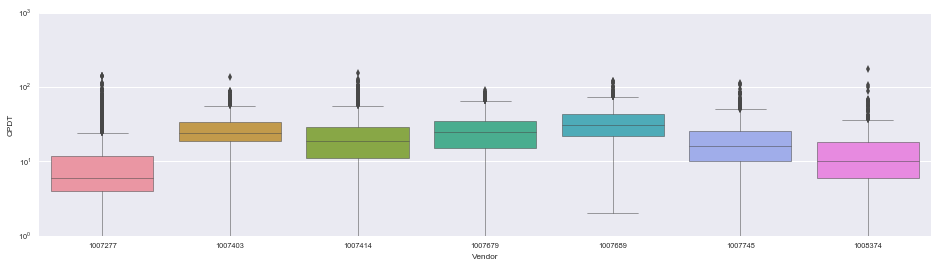

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize = (16, 4))
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=0.75, rc={"lines.linewidth": 0.5})
ax = sns.boxplot(x = "Vendor", y = "CPDT", data = df_selected)
sns.despine(left = True)
ax.set_yscale('log')

In [146]:
top100['word']

0                
5700            X
2325           IN
3131           MM
4495        SHAFT
2945            M
3729        PLATE
4697       SPACER
428         BLOCK
4779           SS
744         CHAIN
362       BEARING
330           BAR
4033         RAIL
466          BORE
3536            P
2084        GUIDE
1               A
4940      SUPPORT
3408           OD
3235          MTG
4761     SPROCKET
2098            H
621         CABLE
5558            W
2728            L
1374        DRIVE
2450         INOD
5010            T
375          BELT
          ...    
5217          TOP
2262          HUB
5264    TRANSPORT
3195        MOTOR
4285       ROLLER
2922          LUG
2436         INLG
1153            D
2166          HEX
3964       PUSHER
1139     CYLINDER
2334       INBORE
3562        PANEL
245          ASSY
4473          SET
1880        FRAME
1931            G
1036        COVER
4970       SWITCH
966     CONNECTOR
2905        LOWER
3384          NUT
4021            R
210           ARM
5201      

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(vocabulary=['SHAFT', 'PLATE', 'SPACER'])

r = cv.fit_transform(df_reduced['Material_Description']).toarray()

In [166]:
r

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ..., 
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [162]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(vocabulary=['hot', 'cold', 'old'])
cv.fit_transform(['pease porridge hot', 'pease porridge cold', 'pease porridge in the pot', 'nine days old']).toarray()

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 1]])

In [133]:
import re
cleanString = re.sub('\W+',' ', 'string with special chars like !,#$% etcs. 12345')

In [134]:
cleanString

'string with special chars like etcs 12345'